In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# import seaborn as sns

import sys
from IPython.display import display

pd.set_option("display.max_columns", None)

def mpl_reset():
    plt.rcParams.update(plt.rcParamsDefault)
    plt.rcParams["figure.figsize"] = (15,8)
    plt.rcParams["xtick.labelsize"] = "large"
    plt.rcParams["ytick.labelsize"] = "large"
    plt.rcParams["axes.labelsize"] = "large"

## threshold optimization

In [116]:
#CORRECT Partitions
correct = []
#FDR = False Discovery Rate (ratio of false positives)
fdr = [0.27, 0.14, 0.104, 0.12]
#FNR = False Negative Rate (ratio of false negatives)
fnr = [0.21, 0.135, 0.156, 0.15]
#Precision (1-FDR)
prec = [(1-x) for x in fdr]
#Recall (1-FNR)
recall = [1-x for x in fnr]

data = list(zip(recall, prec))

df = pd.DataFrame(data)
df.columns = ['Recall', 'Precision']
df = df * 100
df

Recall  Precision
0    79.0       73.0
1    86.5       86.0
2    84.4       89.6
3    85.0       88.0

In [117]:
def plot_histo(df, labels, fname_pdf = None, xlim = [0,100], cmapname = 'tab20b', ylabel = None):
    plt.rcParams["figure.figsize"] = (7,3)
    plt.rcParams["xtick.labelsize"] = "large"
    plt.rcParams["ytick.labelsize"] = "large"
    plt.rcParams["axes.labelsize"] = "large"
    plt.rcParams["font.size"] = 15

    df.plot(kind = 'barh', cmap = plt.get_cmap(cmapname))
    ax = plt.gca()
    plt.legend(['Recall', 'Precision'], bbox_to_anchor=(0., 1.02, 1., .102), loc=1,
               ncol=2, borderaxespad=0., frameon = False)
    ax.invert_yaxis()
    
    if labels is not None:
        ax.set_yticklabels(labels)
    
    if ylabel is not None:
        ax.set_ylabel(ylabel)

    x_offset = 1
    y_offset = -0.01
    for p in ax.patches:
        b = p.get_bbox()
        val = '%.1f' % (p.get_width())        
        ax.annotate(val, (b.x1 + x_offset, b.y1 + y_offset), )

    ax.set_xlim(xlim)
    
    if fname_pdf is not None:
        plt.savefig(fname_pdf, bbox_inches = 'tight')
    else:
        plt.show()
        plt.close()

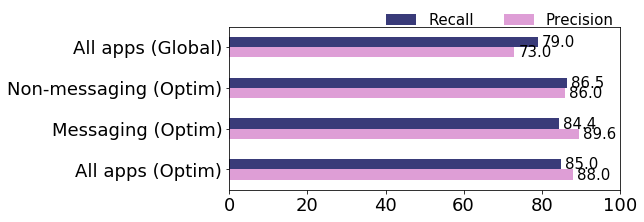

In [118]:
labels = [
    'All apps (Global)',
    'Non-messaging (Optim)',
    'Messaging (Optim)',
    'All apps (Optim)'
]

plot_histo(df, labels=labels, fname_pdf='./histo_threshold.pdf')


## inter-arrival dependency

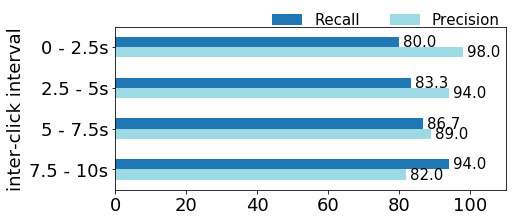

In [121]:
#CORRECT Partitions
fnr = [0.2, 0.167, 0.133, 0.06]
prec = [0.98, 0.94, 0.89, 0.82]
recall = [1-x for x in fnr]
fdr = [1-x for x in prec]

data = list(zip(recall, prec))

df = pd.DataFrame(data)
df.columns = ['Recall', 'Precision']
df = df * 100
df

labels = [
    "0 - 2.5s",
    '2.5 - 5s',
    '5 - 7.5s',
    '7.5 - 10s'
]

plot_histo(df, labels = labels, fname_pdf='histo_intervals.pdf', xlim = [0, 110], cmapname = 'tab20', ylabel = 'inter-click interval')

In [2]:
v = [8,
6,
8,
2,
8,
5,
10,
6,
27,
17,
13,
10,
33,
5,
4,
10,
10,
1]

1.0 * sum(v) / len(v)

10.166666666666666